In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [7]:
df= pd.read_csv("./dataset/canada_per_capita_income.csv")
df

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


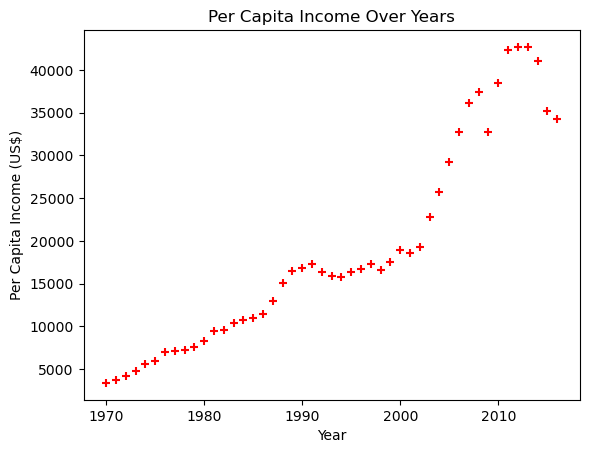

In [8]:
%matplotlib inline
plt.scatter(df['year'], df['per capita income (US$)'],color='red',marker='+')
plt.xlabel('Year')
plt.ylabel('Per Capita Income (US$)')
plt.title('Per Capita Income Over Years')
plt.show()

In [9]:
reg = linear_model.LinearRegression()
reg.fit(df[['year']],df['per capita income (US$)'])

LinearRegression()

In [10]:
year_to_predict = pd.DataFrame({'year': [2000]})  # Match the column name used in training
predicted_income = reg.predict(year_to_predict)
print(f"Predicted per capita income for the year 2000: {predicted_income[0]}")


Predicted per capita income for the year 2000: 24719.392589963274


In [11]:
reg_inverse = linear_model.LinearRegression()
reg_inverse.fit(df[['per capita income (US$)']],df['year'])



LinearRegression()

In [12]:
income_to_predict = pd.DataFrame({'per capita income (US$)':[2000]})
predicted_year = reg_inverse.predict(income_to_predict)
print(f"Predicted year for a per capita income of $2000: {predicted_year[0]:.0f}")

Predicted year for a per capita income of $2000: 1975


In [13]:
reg.coef_

array([828.46507522])

In [14]:
reg.intercept_

-1632210.7578554575

In [15]:
828.46507522*2000 + -1632210.7578554575

24719.39258454251

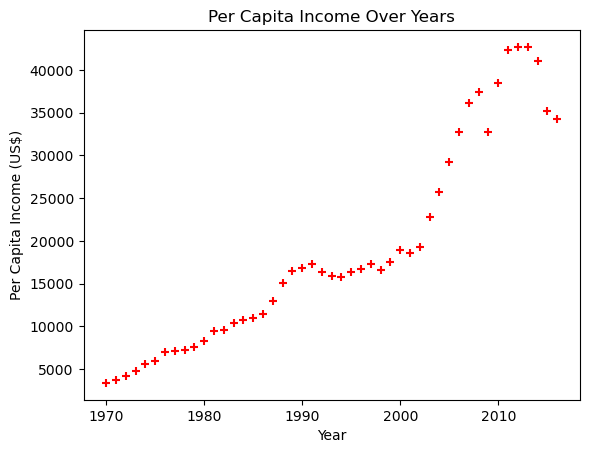

In [16]:
%matplotlib inline
plt.scatter(df['year'], df['per capita income (US$)'],color='red',marker='+')
plt.xlabel('Year')
plt.ylabel('Per Capita Income (US$)')
plt.title('Per Capita Income Over Years')
plt.show()
plt.plot(df.year,reg.predict(df[['year']]),color='blue')

In [17]:
d = pd.read_csv("./dataset/year.csv")
d.head(8)

,year
0,2000
1,3000
2,1000
3,1800
4,1900
5,2010
6,2020
7,2040


In [18]:
p = reg.predict(d)


In [19]:
d['per capita income (US$)'] = p

In [20]:
d

,year,per capita income (US$)
0,2000,24719.392590
1,3000,853184.467813
2,1000,-803745.682633
3,1800,-140973.622455
4,1900,-58127.114932
5,2010,33004.043342
6,2020,41288.694094
7,2040,57857.995599
8,2050,66142.646351


In [21]:
d.to_csv("./dataset/prediction_price.csv",index=False)

In [22]:
year_to_predict = pd.DataFrame({'year':[2020]})
predicted_year1 = reg.predict(year_to_predict)


print(f"prediction of price in 2020 {predicted_year1[0]}")

prediction of price in 2020 41288.69409441762


In [23]:
import pickle

In [24]:
with open('model_pickle','wb') as f:
    pickle.dump(reg,f)

In [27]:
with open('model_pickle','rb') as f:
    mp = pickle.load(f)

In [32]:
year_to_predict = pd.DataFrame({'year':[2020]})
mp.predict(year_to_predict)

array([41288.69409442])

In [34]:
import joblib

In [35]:
joblib.dump(reg,'model_joblib')

['model_joblib']